In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv(r"C:\Users\Administrator\jupyter workspace\泰坦尼克\泰坦尼克数据集\train.csv")

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


PassengerId => 乘客ID
Pclass => 乘客等级(1/2/3等舱位)
Name => 乘客姓名
Sex => 性别
Age => 年龄
SibSp => 旁系亲友个数
Parch => 直系亲友个数
Ticket => 船票信息
Fare => 票价
Cabin => 客舱
Embarked => 登船港口

数据集表现特征并不是那么直观，用图像的形式了解一下存活率的基本情况

0    549
1    342
Name: Survived, dtype: int64


Text(0, 0.5, 'The number of Survival')

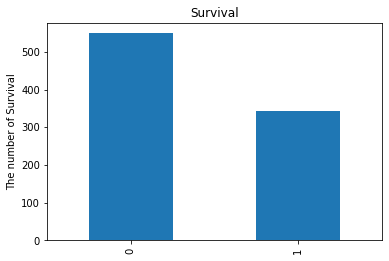

In [4]:
#在事故中存活与丧命的人数情况
print(data.Survived.value_counts())
data.Survived.value_counts().plot(kind='bar')
plt.title("Survival") 
plt.ylabel("The number of Survival")  

3    491
1    216
2    184
Name: Pclass, dtype: int64


Text(0.5, 1.0, 'The distribution of the classes')

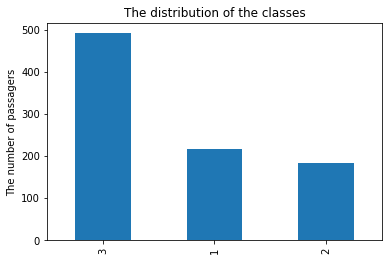

In [5]:
#查看各等级舱房人数情况
print(data.Pclass.value_counts())
data.Pclass.value_counts().plot(kind="bar")
plt.ylabel("The number of passagers")
plt.title("The distribution of the classes")

   Survived  Not survived
1       136            80
2        87            97
3       119           372


<Figure size 432x288 with 0 Axes>

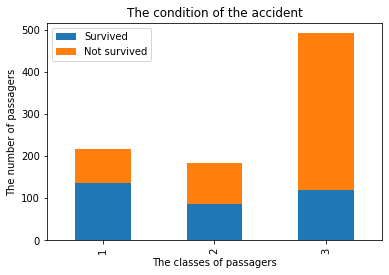

In [6]:
#按舱位等级划分乘客的存活情况到底如何
fig = plt.figure()
fig.set(alpha=0.2)
Survived_0 = data.Pclass[data.Survived == 0].value_counts()
Survived_1 = data.Pclass[data.Survived == 1].value_counts()
df=pd.DataFrame({'Survived':Survived_1, 'Not survived':Survived_0})
print(df)
df.plot(kind='bar', stacked=True)
plt.title("The condition of the accident")
plt.xlabel("The classes of passagers") 
plt.ylabel("The number of passagers") 
plt.show()

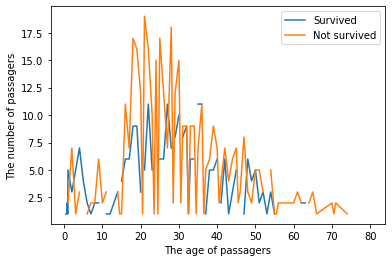

In [7]:
#依据年龄来查看存活与未存活的人数
Survived_age0 = data.Age[data.Survived == 0].value_counts()
Survived_age1 = data.Age[data.Survived == 1].value_counts()
df=pd.DataFrame({'Survived':Survived_age1, 'Not survived':Survived_age0})
df.plot(kind='line')
plt.xlabel("The age of passagers") 
plt.ylabel("The number of passagers") 
plt.show()

从上面的图表我们可以了解到：
(1)在891名乘客中，丧生的有549人，约占总人数的62%
(2)三等舱的乘客最多，达到总人数的55%以上。最少为二等舱的乘客人数
(3)处于三等舱的乘客丧生率最高，达到本舱人数的75%以上。一等舱的乘客丧生率最低，为37%。
(4)丧生年龄段多数在20到30岁之间的青年

In [8]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
#去除无用特征
data.drop(['Cabin',"Name","Ticket"],inplace=True,axis=1)

In [10]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [12]:
#可以看出Age缺失的数据较多，约占20%，且年龄相对比较重要，所以进行年龄的填补

In [13]:
#缺失的地方填上平均值
data["Age"] = data["Age"].fillna(data["Age"].mean())

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [15]:
#因Embarked只缺失了两个数据，故把这两行缺失的数据删除
#删掉所有有缺失值的行
data = data.dropna()

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


In [17]:
#用unique查看登船的港口类别
data["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [18]:
#将登船的港口类别转化为数字型
labels = data["Embarked"].unique().tolist()#将S,C,Q转换为列表
data["Embarked"] = data["Embarked"].apply(lambda x: labels.index(x))#将Embarked中的每一行数据转换为0，1，2

D:\AnacondaPython\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
data.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,0
1,2,1,1,female,38.000000,1,0,71.2833,1
2,3,1,3,female,26.000000,0,0,7.9250,0
3,4,1,1,female,35.000000,1,0,53.1000,0
4,5,0,3,male,35.000000,0,0,8.0500,0
5,6,0,3,male,29.699118,0,0,8.4583,2
6,7,0,1,male,54.000000,0,0,51.8625,0
7,8,0,3,male,2.000000,3,1,21.0750,0
8,9,1,3,female,27.000000,0,2,11.1333,0
9,10,1,2,female,14.000000,1,0,30.0708,1


In [20]:
#转换性别数据，男的为1，女的为0
data["Sex"] = (data["Sex"] == "male").astype("int")

D:\AnacondaPython\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,0


In [22]:
#取出除了survived列的其他数据列
x = data.iloc[:,data.columns !="Survived"]
#取出survived列
y = data.iloc[:,data.columns =="Survived"]

In [23]:
#划分训练集
from sklearn.model_selection import train_test_split,cross_val_score
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.25)

In [24]:
X_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
653,654,3,0,29.699118,0,0,7.8292,2
30,31,1,1,40.000000,0,0,27.7208,1
710,711,1,0,24.000000,0,0,49.5042,1
353,354,3,1,25.000000,1,0,17.8000,0
817,818,2,1,31.000000,1,1,37.0042,1
...,...,...,...,...,...,...,...,...
781,782,1,0,17.000000,1,0,57.0000,0
194,195,1,0,44.000000,0,0,27.7208,1
533,534,3,0,29.699118,0,2,22.3583,1
207,208,3,1,26.000000,0,0,18.7875,1


In [25]:
#纠正索引
for a in [X_train,X_test,Y_train,Y_test]:
    a.index = range(a.shape[0])

In [26]:
X_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,654,3,0,29.699118,0,0,7.8292,2
1,31,1,1,40.000000,0,0,27.7208,1
2,711,1,0,24.000000,0,0,49.5042,1
3,354,3,1,25.000000,1,0,17.8000,0
4,818,2,1,31.000000,1,1,37.0042,1
...,...,...,...,...,...,...,...,...
661,782,1,0,17.000000,1,0,57.0000,0
662,195,1,0,44.000000,0,0,27.7208,1
663,534,3,0,29.699118,0,2,22.3583,1
664,208,3,1,26.000000,0,0,18.7875,1



先使用KNN模型进行测试

D:\AnacondaPython\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':
D:\AnacondaPython\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':
D:\AnacondaPython\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':
D:\AnacondaPython\lib\site-packages\ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':
D:\AnacondaPytho

27 0.7040358744394619


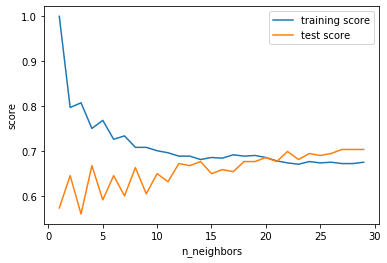

In [27]:
from sklearn.neighbors import KNeighborsClassifier

training_score = [] 
test_score = [] 
neighbors_settings = range(1, 30)
for n_neighbors in neighbors_settings:
    #建立模型
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, Y_train)
    training_score.append(knn.score(X_train, Y_train))
    test_score.append(knn.score(X_test, Y_test))
plt.plot(neighbors_settings, training_score, label="training score") 
plt.plot(neighbors_settings, test_score, label="test score") 
plt.ylabel("score") 
plt.xlabel("n_neighbors") 
plt.legend() 
#打印最好的k值和分数
optimal_k = test_score.index(max(test_score))+1
print(optimal_k,max(test_score))

接下来采用决策树模型

In [28]:
#建立决策树模型
clf = DecisionTreeClassifier(random_state=20)
clf = clf.fit(X_train,Y_train)
score = clf.score(X_test,Y_test)
score

0.7713004484304933

In [29]:
#分数并不是很好，但比knn高
#使用交叉验证查均值
clf = DecisionTreeClassifier(random_state=20)
score = cross_val_score(clf,x,y,cv=10).mean()
score

0.7492211440245148

3 0.8143896833503576


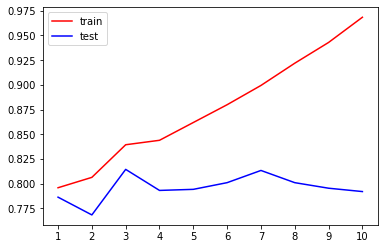

In [30]:
#研究参数，观察最大深度对训练集与测试集的影响
train = []
test = []
for i in range(10): #设定深度为1到10
    clf = DecisionTreeClassifier(random_state=20,max_depth=i+1)
    clf = clf.fit(X_train,Y_train)
    score_train = clf.score(X_train,Y_train)
    score_test = cross_val_score(clf,x,y,cv=10).mean()
    train.append(score_train)
    test.append(score_test)
best_depth = test.index(max(test))+1  
print(best_depth,max(test)) #打印最高分数的depth和分数
#画图
plt.plot(range(1,11),train,color="red",label="train")
plt.plot(range(1,11),test,color="blue",label="test")
plt.xticks(range(1,11))
plt.legend()
plt.show()

随着深度的增加，过拟合的情况越来越严重。
在深度=3的时候过拟合较轻微且分数最高，为0.814。

运用网格搜索尝试找出最好参数

In [31]:
#参数列表
parameters = {"criterion":("gini","entropy")
             ,"splitter":("best","random")
             ,"max_depth":(1,2,3,4,5)
             }


clf = DecisionTreeClassifier(random_state=20)
GS = GridSearchCV(clf,parameters,cv=10)
GS = GS.fit(X_train,Y_train)


In [32]:
GS.best_params_ #返回输入的参数和参数取值中最佳组合

{'criterion': 'entropy', 'max_depth': 3, 'splitter': 'best'}

In [33]:
GS.best_score_ #返回最佳的分数

0.8286521935775667